## baseline, stopword selecting

In [1]:
import os
from konlpy.tag import Mecab
from konlpy.tag import Kkma
from konlpy.tag import Komoran
import pandas as pd
import numpy as np
from collections import Counter
# tokenizer = Mecab()
tokenizer = Kkma()

In [2]:
df = pd.read_csv('./data/train.csv')
print(df.head())


   idx      class                                       conversation
0    0      협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1    1      협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2    2  기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3    3      갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4    4      갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
# class별로 document 모으기
documents_by_class = df.groupby('class')['conversation'].apply(list)
cls_nm = documents_by_class.index.tolist()
cls_cnt = []
for class_name, documents in documents_by_class.items():
    result = []
    for content in documents :
#         print(content)
        tokenlist = tokenizer.pos(content)#,flatten=False 
        for word in tokenlist:
#                 if 'NNG' == word[1] or 'NNP' == word[1] or 'VV' == word[1]:#명사/동사
#             print(word[0][0])
#             print(word[0][1])
            result.append(word[0]+'__'+word[1].lower()) 
    cls_cnt.append(result)
assert len(cls_nm) == len(cls_cnt)

In [4]:
total_counts = Counter('')
temp = []
for i in range(len(cls_nm)):
    word_counts = Counter(cls_cnt[i])
    total_counts = total_counts + word_counts
    temp.append(word_counts)
temp2 =[]
for i in range(len(cls_nm)):
    word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 10}
    sorted_word_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)
#     sorted_word_ratios = sorted(word_ratios.items(), key=lambda x: x[1])
    temp2.append(sorted_word_ratios)
for tt in range(len(temp2)) :
    print(cls_nm[tt])
    print('\n\n'+cls_nm[tt], end=' : ')
    for i in range(min(30,len(temp2[tt]))) :
        print(str(temp2[tt][i]), end=', ')
#         print(str(temp2[tt][i][0]), end=', ')

갈취 대화


갈취 대화 : ('십만__nr', 1.0), ('반지__nng', 1.0), ('자릿세__nng', 1.0), ('차비__nng', 1.0), ('백만__nr', 0.9565217391304348), ('용돈__nng', 0.9512195121951219), ('1000__nr', 0.9354838709677419), ('목걸이__nng', 0.9354838709677419), ('천원__nng', 0.9285714285714286), ('돈만__nng', 0.9285714285714286), ('유출__nng', 0.9285714285714286), ('시계__nng', 0.926829268292683), ('현금__nng', 0.9259259259259259), ('신어__nng', 0.9230769230769231), ('천만__nr', 0.9230769230769231), ('원__nnm', 0.9178832116788321), ('재산__nng', 0.9166666666666666), ('사주__nng', 0.9166666666666666), ('주민__nng', 0.9166666666666666), ('지갑__nng', 0.912621359223301), ('빌려주__vv', 0.91015625), ('만원__nng', 0.9041095890410958), ('통장__nng', 0.9), ('잃어버리__vv', 0.8947368421052632), ('500__nr', 0.8928571428571429), ('100__nr', 0.8809523809523809), ('내노__vv', 0.8781869688385269), ('백__nr', 0.8709677419354839), ('만__nr', 0.8677494199535963), ('입금__nng', 0.8607594936708861), 기타 괴롭힘 대화


기타 괴롭힘 대화 : ('웩__un', 1.0), ('게이__nng', 1.0), ('홍당무__nng', 1.0), ('고릴라__

In [6]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

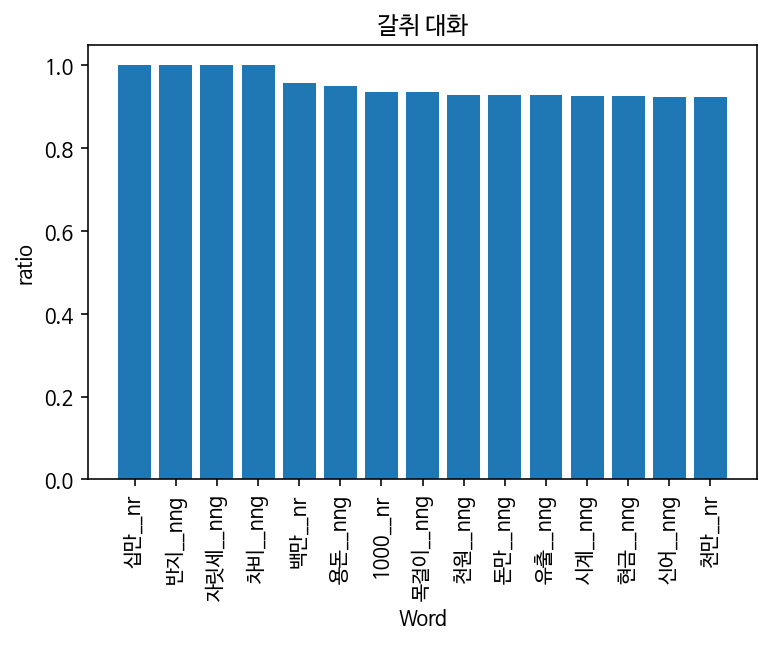

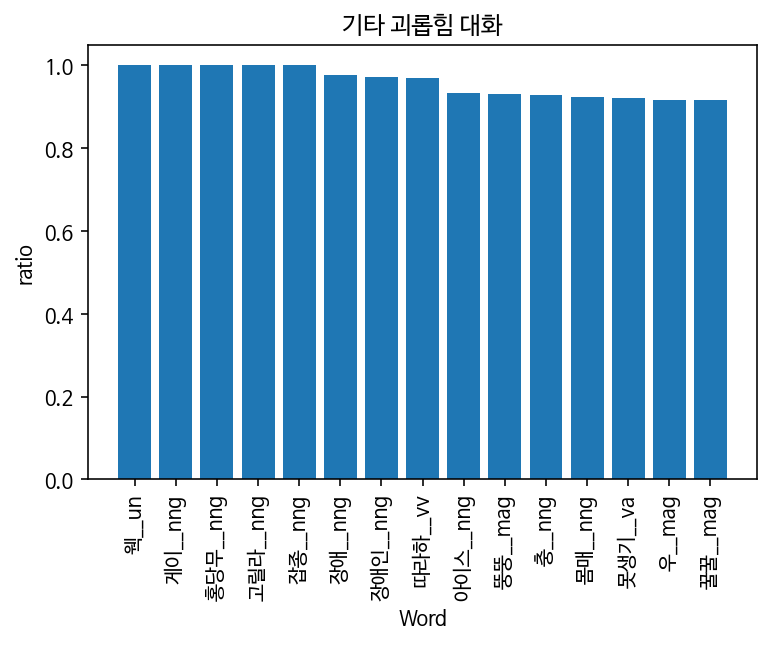

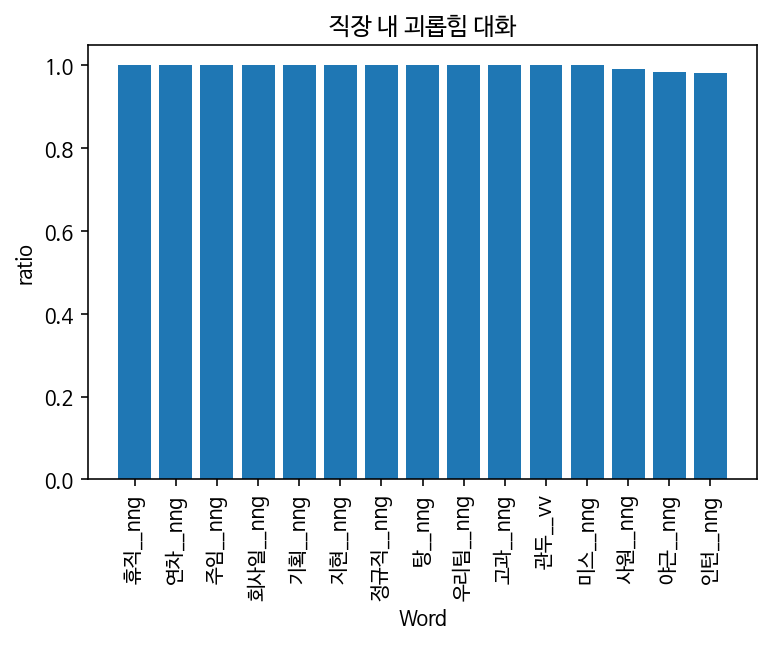

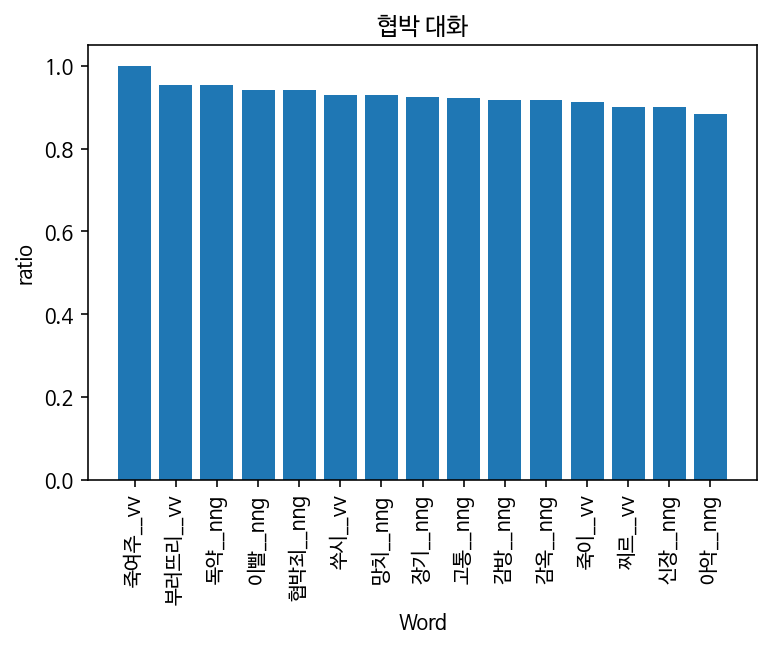

In [7]:


for tt in range(len(temp2)) :
    
    words = [item[0] for item in temp2[tt][:15]]
    counts = [item[1] for item in temp2[tt][:15]]

    # 막대 그래프 그리기
#     plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xlabel('Word')
    plt.ylabel('ratio')
    plt.title(cls_nm[tt])
    plt.xticks(rotation=90)
    plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score #정확도 계산

In [9]:
word_counts_sorted = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
word_counts_sorted

{'.__sf': 5784,
 '어__ecs': 3779,
 '?__sf': 3388,
 '하__xsv': 1928,
 '이__vcp': 1898,
 '가__jks': 1839,
 '고__ece': 1793,
 '하__vv': 1779,
 'ㄹ__etd': 1707,
 '었__ept': 1498,
 'ㄴ__etd': 1413,
 '아__ecs': 1304,
 '거__nnb': 1300,
 '는__etd': 1269,
 '이__jks': 1246,
 '에__jkm': 1219,
 '어__ecd': 1176,
 '게__ecd': 1159,
 '지__ecd': 1046,
 '을__jko': 1040,
 '나__np': 1023,
 '면__ece': 939,
 '너__np': 916,
 '는__jx': 895,
 '도__jx': 892,
 '야__jx': 878,
 '것__nnb': 804,
 '알__vv': 801,
 '겠__ept': 798,
 '내__np': 733,
 '느__vv': 707,
 '죽__vv': 674,
 '!__sf': 671,
 '그러__vv': 669,
 '아__ecd': 637,
 '주__vxv': 632,
 '니__np': 600,
 '왜__mag': 595,
 '만__jx': 591,
 '저__np': 586,
 '네__efn': 580,
 '보__vv': 572,
 '있__vv': 564,
 '말__nng': 551,
 '없__va': 533,
 '하__xsa': 520,
 '어__efn': 510,
 '다__mag': 497,
 '안__mag': 493,
 '를__jko': 492,
 '세요__efn': 487,
 'ㅂ니다__efn': 480,
 '죽이__vv': 477,
 '되__vv': 451,
 '어요__efn': 449,
 '아__vv': 447,
 '아니__vcn': 435,
 '은__jx': 434,
 '시__eph': 424,
 '그리하__vv': 423,
 '버리__vxv': 412,
 '습니다__efn': 394,


In [10]:
from tqdm.notebook import tqdm
train = []
for index, row in tqdm(df.iterrows()):
    result = []
    tokenlist = tokenizer.pos(row['conversation']) 
    for word in tokenlist:
#         print(result)
#         print(word[0]+'__'+word[1].lower())
        result.append(word[0]+'__'+word[1].lower())
#         print(result)
    train.append(result)

0it [00:00, ?it/s]

In [11]:
word_counts_sorted = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
def getStopWrod(cntTh, ratioTh) :
    stopword = []
    for word, count in word_counts_sorted.items():
        if count < cntTh : 
            break
        flag = True
        for tt in range(len(temp2)) :
            for i in range(len(temp2[tt])) :
                if temp2[tt][i][1]<=ratioTh :
                    break
                #threshHold보다 큰 비율을 가지고 있는 단어는 불용어에서 제외한다
                if word==temp2[tt][i][0] and temp2[tt][i][1]>ratioTh :
                    flag = False
#                     print(cls_nm[tt])
#                     print(word)#불용어 제외 단어
                    break
            if not flag :
                break
        if flag :
            stopword.append(word)
    
    return stopword

In [12]:
from sklearn.model_selection import StratifiedKFold

def nfold_cross_validation(X, y, n_splits, model):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
        
    return scores

In [13]:
def testNb(stopword,train) :
    train_remove = []
    for i in range(len(train)):
        result =''
        for word in train[i]:
    #                 if 'NNG' == word[1] or 'NNP' == word[1] or 'VV' == word[1]:#명사/동사
            if word not in stopword :
                result = result + ' ' + word
        train_remove.append(result)
    encoder = LabelEncoder()
    df['class'] = encoder.fit_transform(df['class'])
#     X_train, X_val, y_train, y_val = train_test_split(train_remove, df['class'], test_size=0.1, random_state=77)
#     vectorizer = CountVectorizer()
#     X_train = vectorizer.fit_transform(X_train)
#     X_val = vectorizer.transform(X_val) #테스트 데이터를 DTM으로 변환
    X_train = train_remove
    y_train = df['class']
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    model = MultinomialNB()
    model.fit(X_train, y_train)
#     predicted = model.predict(X_val) #테스트 데이터에 대한 예측
#     print("NB 정확도:", accuracy_score(y_val, predicted)) #예측값과 실제값 비교
    score = nfold_cross_validation(X_train,y_train,10,model)
#     print(score)
#     print(np.mean(score))
    return np.mean(score)

In [14]:
stopword=[]
print(testNb(stopword,train))

cntTh = [50,100,150,200]
ratioTh = [0.3,0.4,0.5,0.6,0.7,0.8]
cntThVar = []
ratioThVar = []
acc = []
for cth in cntTh :
    for rth in ratioTh :
        print('cntTh : ' + str(cth)+', ratioTh : ' + str(rth),end=', ')
        stopword = getStopWrod(cth, rth)
        cntThVar.append(cth)
        ratioThVar.append(rth)
        score = testNb(stopword,train)
        acc.append(score)
        print(score)
        

0.8716455696202532
cntTh : 50, ratioTh : 0.3, 0.8769620253164557
cntTh : 50, ratioTh : 0.4, 0.8774683544303798
cntTh : 50, ratioTh : 0.5, 0.8751898734177216
cntTh : 50, ratioTh : 0.6, 0.8718987341772152
cntTh : 50, ratioTh : 0.7, 0.8703797468354431
cntTh : 50, ratioTh : 0.8, 0.860253164556962
cntTh : 100, ratioTh : 0.3, 0.8782278481012659
cntTh : 100, ratioTh : 0.4, 0.8756962025316456
cntTh : 100, ratioTh : 0.5, 0.8769620253164557
cntTh : 100, ratioTh : 0.6, 0.8762025316455697
cntTh : 100, ratioTh : 0.7, 0.8736708860759494
cntTh : 100, ratioTh : 0.8, 0.8668354430379747
cntTh : 150, ratioTh : 0.3, 0.8767088607594937
cntTh : 150, ratioTh : 0.4, 0.8762025316455697
cntTh : 150, ratioTh : 0.5, 0.8772151898734177
cntTh : 150, ratioTh : 0.6, 0.8777215189873419
cntTh : 150, ratioTh : 0.7, 0.8769620253164557
cntTh : 150, ratioTh : 0.8, 0.8706329113924051
cntTh : 200, ratioTh : 0.3, 0.8772151898734177
cntTh : 200, ratioTh : 0.4, 0.8784810126582279
cntTh : 200, ratioTh : 0.5, 0.8779746835443039
c

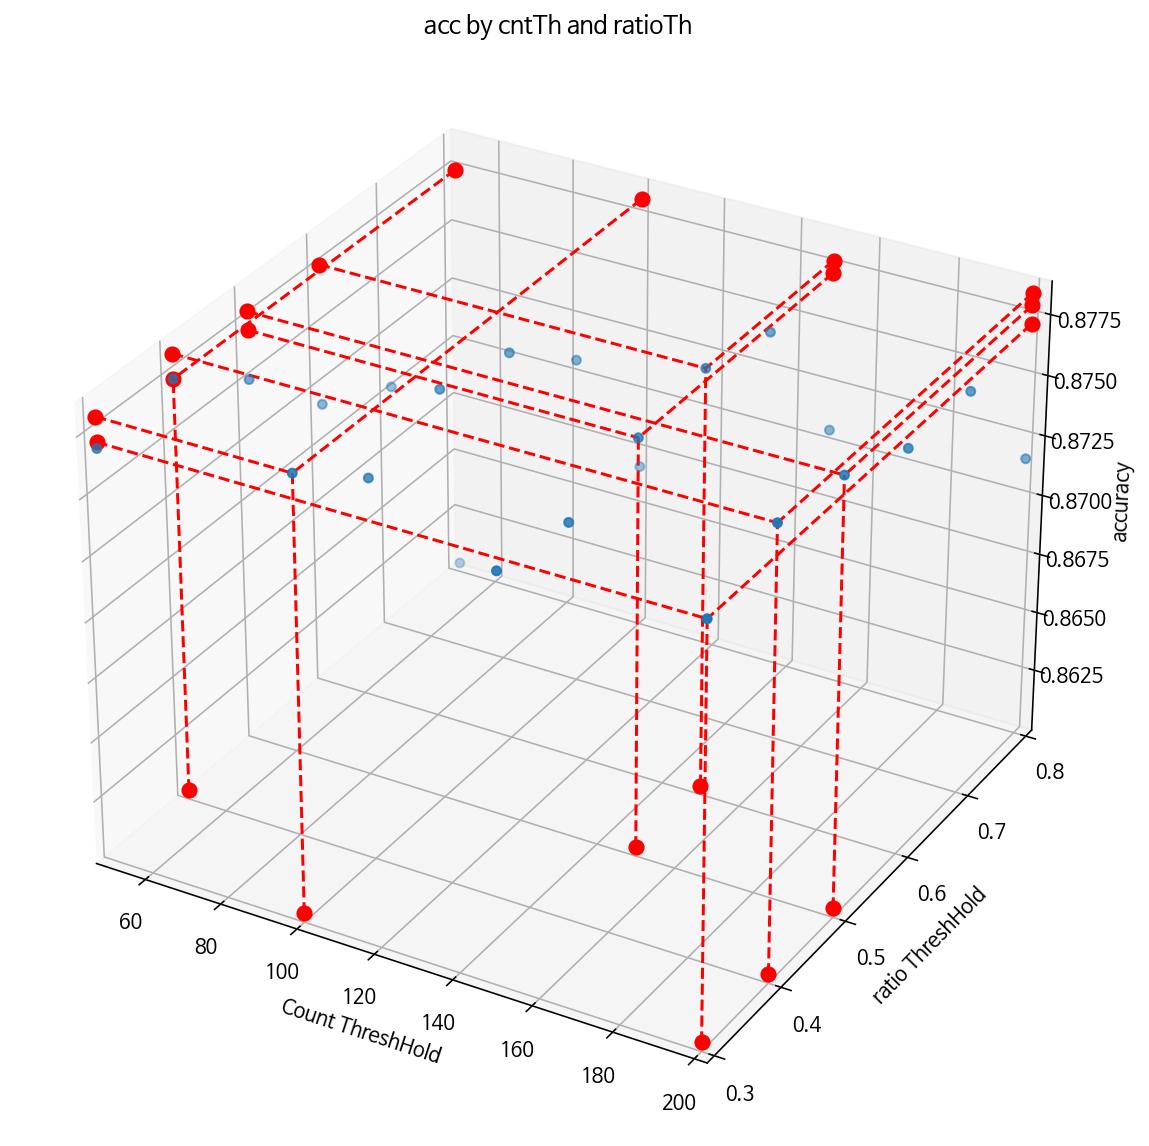

In [15]:
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3차원 그래프 그리기
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cntThVar, ratioThVar, acc)
ax.set_xlabel('Count ThreshHold')
ax.set_ylabel('ratio ThreshHold')
ax.set_zlabel('accuracy')
# X, Y, Z 보조선 그리기
# 보조선 그리기
for i in range(len(cntThVar)):
    if acc[i]>0.877 :
        ax.plot([cntThVar[i], cntThVar[i]], [ratioThVar[i], ratioThVar[i]], [min(acc), acc[i]], 'r--')
        ax.plot([cntThVar[i], cntThVar[i]], [max(ratioThVar), ratioThVar[i]], [acc[i], acc[i]], 'r--')
        ax.plot([min(cntThVar), cntThVar[i]], [ratioThVar[i], ratioThVar[i]], [acc[i], acc[i]], 'r--')
        ax.scatter(cntThVar[i], ratioThVar[i], min(acc), color='red', s=50)
        ax.scatter(cntThVar[i], max(ratioThVar), acc[i], color='red', s=50)
        ax.scatter(min(cntThVar), ratioThVar[i], acc[i], color='red', s=50)
ax.set_xlim(min(cntThVar), max(cntThVar))
ax.set_ylim(min(ratioThVar), max(ratioThVar))
ax.set_zlim(min(acc), max(acc))
plt.title('acc by cntTh and ratioTh')
plt.show()

In [16]:
idx = acc.index(max(acc))
print('cnt th : ' + str(cntThVar[idx]))
print('ratio th : ' + str(ratioThVar[idx]))
print('accuracy : ' + str(acc[idx]))

cnt th : 200
ratio th : 0.4
accuracy : 0.8784810126582279
